In [1]:
# Standard Data Packages
import pandas as pd
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

# Modelling
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [2]:
train_set = pd.read_csv("train_norm_set.csv")
val_set = pd.read_csv("val_norm_set.csv")

Train set score: 0.8260000173125698
Cross validation scores: [0.8287025  0.82852939 0.82826971 0.82011773 0.82020429 0.8273892
 0.82522507 0.82470568 0.82721607 0.82860111]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     91090
           1       0.67      0.34      0.45     24433

    accuracy                           0.83    115523
   macro avg       0.76      0.65      0.68    115523
weighted avg       0.81      0.83      0.80    115523



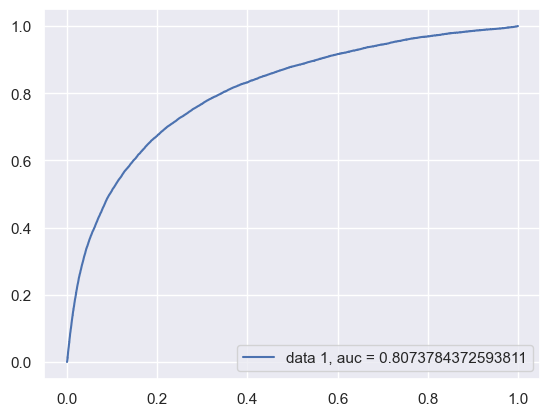

In [3]:
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]


X_train = train_set[features]
Y_train = train_set["Exited"]

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("Train set score: " + str(lr.score(X_train, Y_train)))

scores = cross_val_score(lr, X_train, Y_train, cv = 10)
print("Cross validation scores: " + str(scores))

predict_train = lr.predict(X_train)

print(metrics.classification_report(Y_train, predict_train))

y_pred_proba = lr.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     39023
           1       0.67      0.35      0.46     10488

    accuracy                           0.83     49511
   macro avg       0.76      0.65      0.68     49511
weighted avg       0.81      0.83      0.80     49511



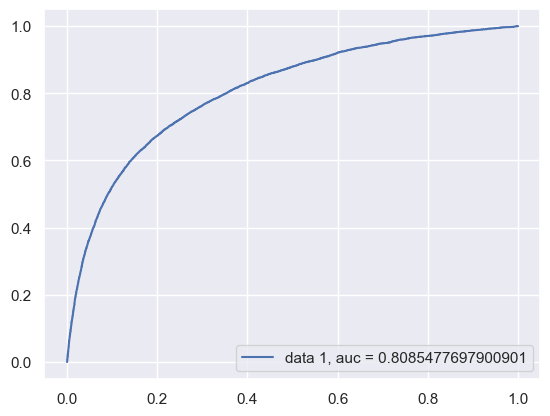

In [4]:
X_val = val_set[features]
Y_val = val_set["Exited"]

score_val = lr.score(X_val, Y_val)

predict_val = lr.predict(X_val)

print(metrics.classification_report(Y_val, predict_val))

y_pred_proba = lr.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

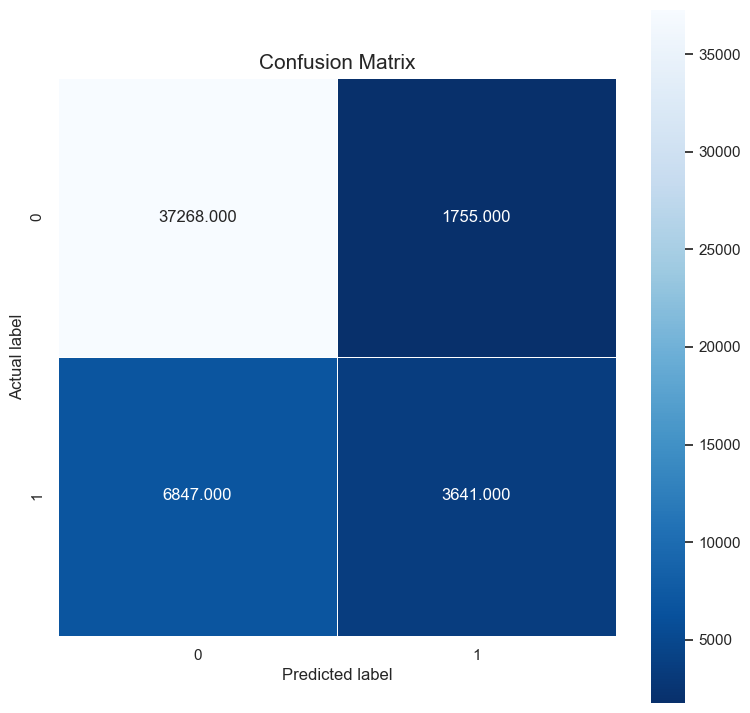

In [7]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()